In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-04 09:33:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-04 09:34:00 (47.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy() #since its a -csv we can use pandas

In [5]:
# inspect the data (2D array)
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [6]:
# split the x & y, inputs and targets
X = data[:,0].reshape(-1, 1) # making an N x D matrix
Y = data[:,1]

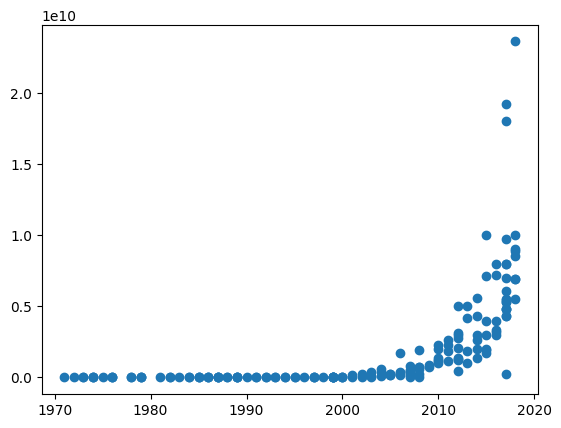

In [7]:
# plot the data
plt.scatter(X, Y)

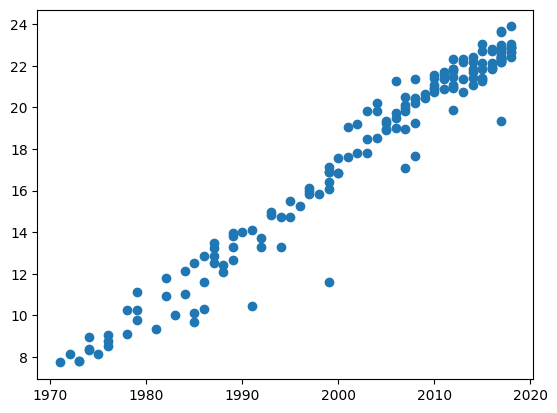

In [8]:
# we want a linear model, so we're gonna take the log
Y = np.log(Y)
plt.scatter(X,Y)

In [9]:
# translate the data, subtract the mean (wich gives 0 mean bisacly)
X = X - X.mean()

In [10]:
# build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [11]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9), # learning rate, momentum
    loss='mse', # mean square error

)

In [12]:
# creat a learnig rate schedualer
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

# create the lrs-object
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [13]:
# train the model
r = model.fit(X, Y, epochs=200,
              callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 800.9179 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 1812.9189 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 1954.5405 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 2049.2830 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 1322.1545 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 740.9084 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 453.0230 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 261.4149 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 101.3902 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 71.5344 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 5ms/step - 

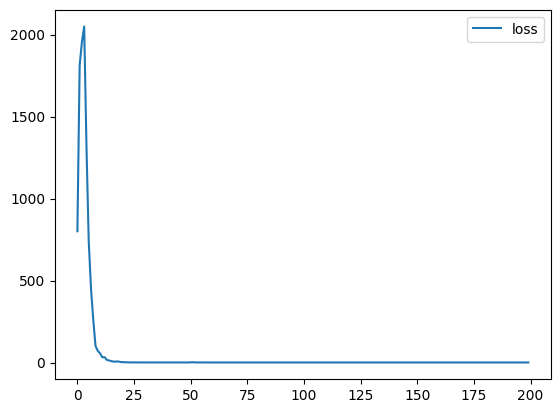

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [15]:
# check wich kind of data we can get out of this model
model.layers

In [16]:
model.layers[0].get_weights()

[array([[0.34289655]], dtype=float32), array([17.756044], dtype=float32)]

In [17]:
# get 0.3361963
a = model.layers[0].get_weights()[0][0,0]

In [18]:
a

0.34289655

In [19]:
# our transistor count doubles every 2 years
print("Time to double", np.log(2) / a)

Time to double 2.0214469313068597


In [20]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
slope = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(slope, b)

0.341682487387313 17.764939393631764


6/6 [==============================] - 0s 2ms/step


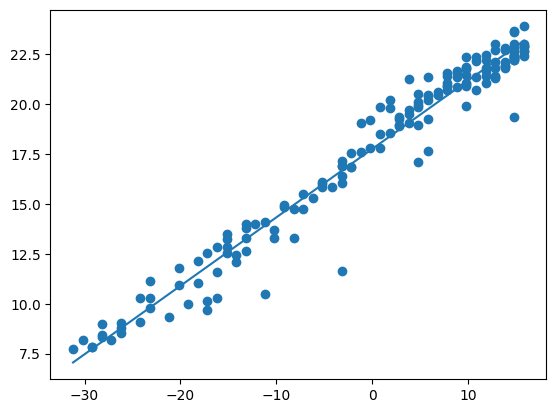

In [22]:
# Making predictions
# make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [23]:
# manual calculation

# get the weights
w, b = model.layers[0].get_weights()

# reshape X because we flattened it earlier
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) +b).flatten()

# dont use == for flaoting points
np.allclose(Yhat, Yhat2)

True